In [1]:
## Notebook 4 - Prostate GLM modeling and Regularization
# Daniel Sandoz

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from scipy.io import arff
from io import StringIO
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [3]:
prostate = pd.read_csv('C:/Users/Modeling/Documents/Predictive Models/PM Data/prostate.csv')
prostate.shape
prostate.head(10)


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
5,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
7,0.693147,3.539509,58,1.536867,0,-1.386294,6,0,0.854415
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319


In [4]:
# check headers
prostate.head(10)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
5,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
7,0.693147,3.539509,58,1.536867,0,-1.386294,6,0,0.854415
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319


In [5]:
# check all column names
prostate.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')

In [8]:
# designating target variable
targetName = 'lpsa'
targetSeries = prostate[targetName]

# removing target from current location and insert in column 0
del prostate[targetName]
prostate.insert(0, targetName, targetSeries)

In [9]:
prostate.describe()

,lpsa,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,2.478387,1.350010,3.652686,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443
std,1.154329,1.178625,0.496631,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035
min,-0.430783,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
25%,1.731656,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
50%,2.591516,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000
75%,3.056357,2.127041,3.878466,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000
max,5.582932,3.821004,6.107580,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000


In [10]:
prostate.info(128)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lpsa     97 non-null     float64
 1   lcavol   97 non-null     float64
 2   lweight  97 non-null     float64
 3   age      97 non-null     int64  
 4   lbph     97 non-null     float64
 5   svi      97 non-null     int64  
 6   lcp      97 non-null     float64
 7   gleason  97 non-null     int64  
 8   pgg45    97 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


In [11]:
# data transformation
# copy data into df for manipulation
df = prostate 

# perform data transformation
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]

# copy df back into data        
prostate = df 

In [12]:
X = prostate.iloc[:,1:].values
y = prostate.iloc[:,0].values

In [13]:
# confirm target variable corresponds to X
X 
# confirm target variable corresponds to y
y 

array([-0.43078292, -0.16251893, -0.16251893, -0.16251893,  0.37156356,
        0.76546784,  0.76546784,  0.85441533,  1.04731899,  1.04731899,
        1.2669476 ,  1.2669476 ,  1.2669476 ,  1.34807315,  1.39871688,
        1.44691898,  1.47017585,  1.4929041 ,  1.55814462,  1.59938758,
        1.63899671,  1.65822808,  1.69561561,  1.71379793,  1.73165555,
        1.76644166,  1.80005827,  1.81645208,  1.84845481,  1.89461685,
        1.92424865,  2.00821403,  2.00821403,  2.02154756,  2.04769284,
        2.08567209,  2.15755932,  2.19165353,  2.21375388,  2.27726729,
        2.29757255,  2.30757263,  2.32727771,  2.37490575,  2.52172062,
        2.55334381,  2.56878813,  2.56878813,  2.59151638,  2.59151638,
        2.65675691,  2.67759099,  2.68444034,  2.69124308,  2.7047113 ,
        2.71800053,  2.78809291,  2.7942279 ,  2.8063861 ,  2.81241022,
        2.84199817,  2.85359251,  2.85359251,  2.88200351,  2.88200351,
        2.88759011,  2.92046979,  2.96269242,  2.96269242,  2.97

In [16]:
# identifing df target and features before regression
prostate.target=prostate['lpsa'] 
prostate.features=prostate.drop(['lpsa'], axis=1)                         
print(prostate.target.shape)
print(prostate.features.shape)

(97,)
(97, 8)


C:\Users\Modeling\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# check target variable
print(prostate.target.head(10))

0   -0.430783
1   -0.162519
2   -0.162519
3   -0.162519
4    0.371564
5    0.765468
6    0.765468
7    0.854415
8    1.047319
9    1.047319
Name: lpsa, dtype: float64


In [18]:
# check feature variable
print(prostate.features.head(10))

     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45
0 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0
1 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0
2 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20
3 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0
4  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0
5 -1.049822  3.228826   50 -1.386294    0 -1.386294        6      0
6  0.737164  3.473518   64  0.615186    0 -1.386294        6      0
7  0.693147  3.539509   58  1.536867    0 -1.386294        6      0
8 -0.776529  3.539509   47 -1.386294    0 -1.386294        6      0
9  0.223144  3.244544   63 -1.386294    0 -1.386294        6      0


In [ ]:
## A: Build Models


In [21]:
## Data Paritition 60/40
features_train, features_test, target_train, target_test = train_test_split(
    prostate.iloc[:,1:].values, prostate.iloc[:,0].values, test_size=0.40, random_state=0)

In [ ]:
## Ridge Regression

In [22]:
# Call up model 
rr_model = Ridge(alpha=5)
# fit model
prostate_rr = rr_model.fit(features_train, target_train)
print(prostate_rr)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [25]:
# model predictions
expected_rr = target_test
predicted_rr = prostate_rr.predict(features_test)

# summarize fit
print('Coef:',prostate_rr.intercept_,prostate_rr.coef_)
print('MSE:',mean_squared_error(expected_rr,predicted_rr))
print('RMSE:',np.sqrt(mean_squared_error(expected_rr,predicted_rr)))
print('MAE:',mean_absolute_error(expected_rr,predicted_rr))
print('R2 score:',r2_score(expected_rr,predicted_rr))

Coef: 1.0352981193974617 [ 0.61523155  0.29909425 -0.01992582  0.11147323  0.49755137 -0.12391697
  0.06517176  0.00552918]
MSE: 0.5302175529169737
RMSE: 0.7281603895550579
MAE: 0.5502737780783434
R2 score: 0.6115001690368056


In [ ]:
## Optimizing Ridge Regression

In [26]:
# GridSearch 1

# import package
from sklearn.model_selection import GridSearchCV
# choose range, starting big
param_grid ={"alpha": [5,20,50,100]} 

# perform grid search
grid_search_rr = GridSearchCV(rr_model, param_grid=param_grid,n_jobs=1,cv=10)
grid_search_rr.fit(features_train,target_train)

# print results
print('Best:',grid_search_rr.best_params_)

Best: {'alpha': 5}


In [27]:
# GridSearch 2

from sklearn.model_selection import GridSearchCV
# choose range, getting smaller
param_grid ={"alpha": [1,2,3,4,5,6,7,8]} 

# perform grid search
grid_search_rr = GridSearchCV(rr_model, param_grid=param_grid,n_jobs=1,cv=10)
grid_search_rr.fit(features_train,target_train)

# print results
print('Best:',grid_search_rr.best_params_)

Best: {'alpha': 3}


In [28]:
# GridSearch 3

from sklearn.model_selection import GridSearchCV
# choose range, best
param_grid ={"alpha": [3,3.5,4,4.5,5]}

# perform grid search
grid_search_rr = GridSearchCV(rr_model, param_grid=param_grid,n_jobs=1,cv=10)
grid_search_rr.fit(features_train,target_train)

# print results
print('Best:',grid_search_rr.best_params_)

Best: {'alpha': 3}


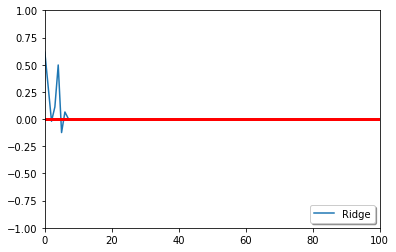

In [29]:
# analyzing coeffecients 
fig, ax = plt.subplots()
plt.plot(prostate_rr.coef_, label='Ridge')
plt.axhline(linewidth=3,color = 'r') # reference line
legend = ax.legend(loc='lower right', shadow=True)
axes = plt.gca()
axes.set_ylim([-1,1])
axes.set_xlim([0,100])
plt.show()

In [30]:
# cross validation (for gigs)
cv_scores_rr = cross_val_score(prostate_rr, features_train, target_train, cv=10,scoring='r2')
print('CV Score for each K', cv_scores_rr)
print('CV mean score: ', cv_scores_rr.mean())

CV Score for each K [ 0.61597313  0.29488933  0.47197015  0.43793307  0.68721875  0.36096198
  0.59838538 -1.28748467  0.53717585  0.88944383]
CV mean score:  0.360646678778909


In [ ]:
## Interpretation

In [ ]:
# The Optimized Ridge Regression Model returned high errors: MSE = .53;
# RMSE = .73; MAE = .55. The model also returns back an R^2 of .61
# meaning that this ridge regression model is able to explain 61% of 
# the variance (which is vairly high considering the amount of features
# in the data set). The nature of Ridge Regression forces the model
# to consider all features in the data set. GridSearch allowed for the optimization of
# all features. This package narrowed the alpha down to five when considering
# all features. This is alphas relates to the penalty that adds bias to 
# data that contains many vaiables (columns) and not many data points (rows)
# while still considering accuracy.
# When considering the cross validation score (.36), this model returns
# a low accuracy when compared to out-of-sample data.
# It may be possible to increase this accuracy with other models
# that do not hold users to consider all features, possibly increasing accuracy
# while employing a computationally cheaper approach.

In [ ]:
## Lasso Regression

In [31]:
# call model
las_model = Lasso(alpha=2.5)

# fit model
prostate_las = las_model.fit(features_train,target_train)
print(prostate_las)

Lasso(alpha=2.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [32]:
# model predictions
expected_las = target_train
predicted_las = prostate_las.predict(features_train)

# summarize fit
print('Coef:',prostate_las.intercept_,prostate_las.coef_)
print('MSE:',mean_squared_error(expected_las,predicted_las))
print('RMSE:',np.sqrt(mean_squared_error(expected_las,predicted_las)))
print('MAE:',mean_absolute_error(expected_las,predicted_las))
print('R2 score:',r2_score(expected_las,predicted_las))

Coef: 2.1411761880890308 [0.         0.         0.         0.         0.         0.
 0.         0.01291531]
MSE: 1.089662785237931
RMSE: 1.0438691418170818
MAE: 0.7909701213389255
R2 score: 0.1521513729621563


In [34]:
# print scores
scores_las = cross_val_score(prostate_las, features_train, target_train, cv=10,scoring='r2')
print('CV Score for each K', scores_las)
print('CV mean score: ', scores_las.mean())

CV Score for each K [-0.03234172  0.14309725 -0.4436584  -0.35956378  0.10173952 -0.19244862
 -0.15293598 -0.55744     0.3477859  -0.76749814]
CV mean score:  -0.1913263974712255


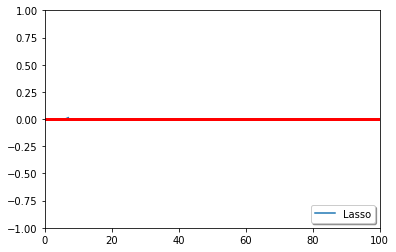

In [36]:
# analyzing coeffecients 
fig, ax = plt.subplots()
plt.plot(prostate_las.coef_, label='Lasso')
plt.axhline(linewidth=3,color = 'r') # reference line
legend = ax.legend(loc='lower right', shadow=True)
axes = plt.gca()
axes.set_ylim([-1,1])
axes.set_xlim([0,100])
plt.show()

In [ ]:
## Interpretation 

In [ ]:
# The Optimized Lasso Regression Model returned high errors: 
# MSE = 1.1; RMSE = 1.0; MAE = .79. The model also retuned 
# an R^2 value of .15. The cross validation score is also very low (-.19).
# This does not build a good case for model deployment.

In [ ]:
## Elastic-Net Regression

In [38]:
# call model
er_model = ElasticNet(alpha=.01)

# fit model
prostate_er = er_model.fit(features_train,target_train)
print(prostate_er)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [39]:
# model predictions
expected_er = target_test
predicted_er = prostate_er.predict(features_test)

# summarize fit
print('Coef:',prostate_er.intercept_,prostate_er.coef_)
print('MSE:',mean_squared_error(expected_er,predicted_er))
print('RMSE:',np.sqrt(mean_squared_error(expected_er,predicted_er)))
print('MAE:',mean_absolute_error(expected_er,predicted_er))
print('R2 score:',r2_score(expected_er,predicted_er))

Coef: 0.847896207700306 [ 0.65634275  0.34054612 -0.0221488   0.12043914  0.81875445 -0.21561766
  0.07026465  0.00507942]
MSE: 0.5552706425727711
RMSE: 0.7451648425501375
MAE: 0.5700843996266978
R2 score: 0.5931433246757756


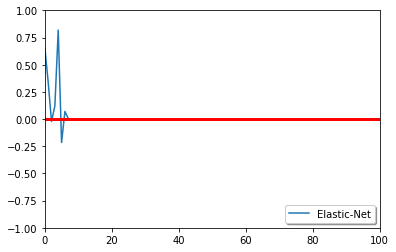

In [42]:
# analyzing coefficients 
fig, ax = plt.subplots()
plt.plot(prostate_er.coef_, label='Elastic-Net')
plt.axhline(linewidth=3,color = 'r') # reference line
legend = ax.legend(loc='lower right', shadow=True)
axes = plt.gca()
axes.set_ylim([-1,1])
axes.set_xlim([0,100])
plt.show()

In [43]:
# GridSearch 

# choose range
param_grid = {'alpha': [.01,.1,.25,.5,1,3]}

# perform grid search
grid_search_er = GridSearchCV(er_model, param_grid=param_grid,n_jobs=1,cv=10)
grid_search_er.fit(features_train,target_train)

# print results
print('Best:',grid_search_er.best_params_)

Best: {'alpha': 0.01}


In [45]:
# cross validation
cv_scores_er = cross_val_score(prostate_er, features_train, target_train, cv=10, scoring='r2')
print('CV Score for each K', cv_scores_er)
print('CV mean score: ', cv_scores_er.mean())

CV Score for each K [ 0.59778231  0.23146873  0.46029402  0.36154438  0.68752252  0.39465887
  0.63765822 -1.37030883  0.59113948  0.94499196]
CV mean score:  0.35367516465949633


In [ ]:
## Interpretation

In [ ]:
# The Optimized Elastic-Net Regression Model also returned high errors:
# MSE = .55; RMSE = .75; MAE = .57. This model also returned an R^2 value 
# of R^2 = .59 meaning that the Elastic-Net Regression Model was able to
# explain ~ 60% of the variance found in the data which is considerably high
# and compareable to that of the Ridge Regession Model. The cross validation 
# score is low at .35, which refers to the out of sample accuracy
# of this model. 

In [ ]:
## Linear Regression

In [ ]:
# To act as a baseline of comparison, I will be delpoying a basic linear 
# regression model. However basic, this model has potential to accurately 
# predict outcomes and can be easily interpreted. This will act as a 
# basic model used for compairson purposes.

In [46]:
# call model
lr_model = LinearRegression(normalize=True)
prostate_lr = lr_model.fit(features_train, target_train)
print(prostate_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [48]:
# model predictions
expected_lr = target_test
predicted_lr = prostate_lr.predict(features_test)

# summarize fit
print('Coef:',prostate_lr.intercept_,prostate_lr.coef_)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('MSE:',mean_squared_error(expected_lr,predicted_lr))
print('RMSE:',np.sqrt(mean_squared_error(expected_lr,predicted_lr)))
print('MAE:',mean_absolute_error(expected_lr,predicted_lr))
print('R2 score:',r2_score(expected_lr,predicted_lr))

Coef: 0.6438983818366015 [ 0.66284602  0.36009851 -0.02321984  0.1238977   0.91804858 -0.24645699
  0.09577418  0.00458384]
MSE: 0.5699693949838746
RMSE: 0.754963174587923
MAE: 0.5804021026420941
R2 score: 0.5823732873662455


In [49]:
#cross validation
cv_scores_lr = cross_val_score(prostate_lr, features_train, target_train, cv=10,scoring='r2')
print('CV Score for each K', cv_scores_lr)
print('CV mean score: ', cv_scores_lr.mean())

CV Score for each K [ 0.58906457  0.21035997  0.45349899  0.29844333  0.67629556  0.39452676
  0.62908087 -1.37944244  0.56093865  0.94926304]
CV mean score:  0.33820292984311073


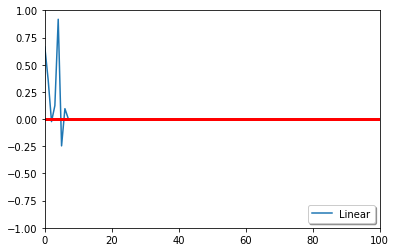

In [50]:
# analyzing coefficients
fig, ax = plt.subplots()
plt.plot(prostate_lr.coef_, label='Linear')
plt.axhline(linewidth=3,color = 'r') # reference line
legend = ax.legend(loc='lower right', shadow=True)
axes = plt.gca()
axes.set_ylim([-1,1])
axes.set_xlim([0,100])
plt.show()

In [ ]:
# The Linear Regression model returned low errors: MSE = .57; 
# RMSE = .75; MAE = .58. The model returned an R^2 of 
# R^2 = .58. This means that 58% of the variance found in the data set
# can be explained by the Linear Regression model. These high errors
# can be cause by the small data set. This model also returns a very 
# low cross validation score
# at .33 which shows low out-of-sample accuracy and
# weakens its arguement for depolyment. 

In [ ]:
## Model Compairison 

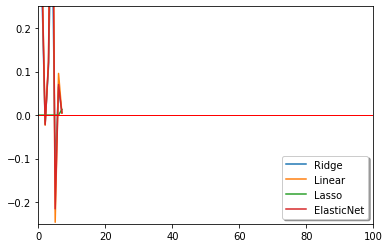

In [52]:
fig, ax = plt.subplots()
plt.plot(prostate_rr.coef_, label='Ridge')
plt.plot(prostate_lr.coef_, label='Linear')
plt.plot(prostate_las.coef_, label='Lasso')
plt.plot(prostate_er.coef_, label='ElasticNet')
plt.axhline(linewidth=1,color = 'r') # reference line
legend = ax.legend(loc='lower right', shadow=True)
axes = plt.gca()
axes.set_ylim([-.25,.25])
axes.set_xlim([0,100])
plt.show()

In [ ]:
## Interpretation Summary

In [ ]:
# All models used here have both positive and negative components.
# More data interpretation and investigation is needed in order to 
# justify deployment to manufacturing. To increase justification, it
# is necessary to employ cross validation and GridSearch techniques on
# more data. When choosing a regression model from above, it is difficult
# to decide between Elastic-Net, Ridge, and Linear. They all have very
# close R^2 and cross validation outputs. 
# When considering a data source with such few data points, its difficult
# to find a model that can accuretly predict outcomes due to lack of 
# training data. 
# With this amount of data I think that the best model would be the Ridge
# Regression optimized with three GridSearches. 
# With Ridge Regression having the most accurate variance measures and
# cross validation score, also considering the nature of this small data set
# therefore lack of necessary computing resources, I think that Ridge 
# Regression with GridSearch Optimization is the best of these models 
# to deploy.
